In [53]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_table
import plotly.express as px
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import fmin
from hyperopt import hp, tpe, fmin, Trials
pd.options.plotting.backend = 'plotly'

In [2]:
# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv("turnover.csv")

# Take a quick look to the first 5 rows of data
print(data.head())
print("----------------------------------------------------------------------------------")

# Get some information on the types of variables in data
data.info()

   satisfaction  evaluation  number_of_projects  average_montly_hours  \
0          0.38        0.53                   2                   157   
1          0.80        0.86                   5                   262   
2          0.11        0.88                   7                   272   
3          0.72        0.87                   5                   223   
4          0.37        0.52                   2                   159   

   time_spend_company  work_accident  churn  promotion department  salary  
0                   3              0      1          0      sales     low  
1                   6              0      1          0      sales  medium  
2                   4              0      1          0      sales  medium  
3                   5              0      1          0      sales     low  
4                   3              0      1          0      sales     low  
----------------------------------------------------------------------------------
<class 'pandas.core.fr

In [3]:
# Print the unique values of the "department" column
print(data.department.unique())
print("----------------------------------------------------------------------------------")
# Print the unique values of the "salary" column
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
----------------------------------------------------------------------------------
['low' 'medium' 'high']


In [4]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode categories
data.salary = data.salary.cat.codes

In [5]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)
# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


In [6]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new dataframe "departments" to your employee dataset: done
data = data.join(departments)

In [7]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.churn.value_counts())
print("--------------------------------------------------------------------------------------------")
# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    11428
1     3571
Name: churn, dtype: int64
--------------------------------------------------------------------------------------------
0    76.191746
1    23.808254
Name: churn, dtype: float64


In [8]:
## CORRELATIONS

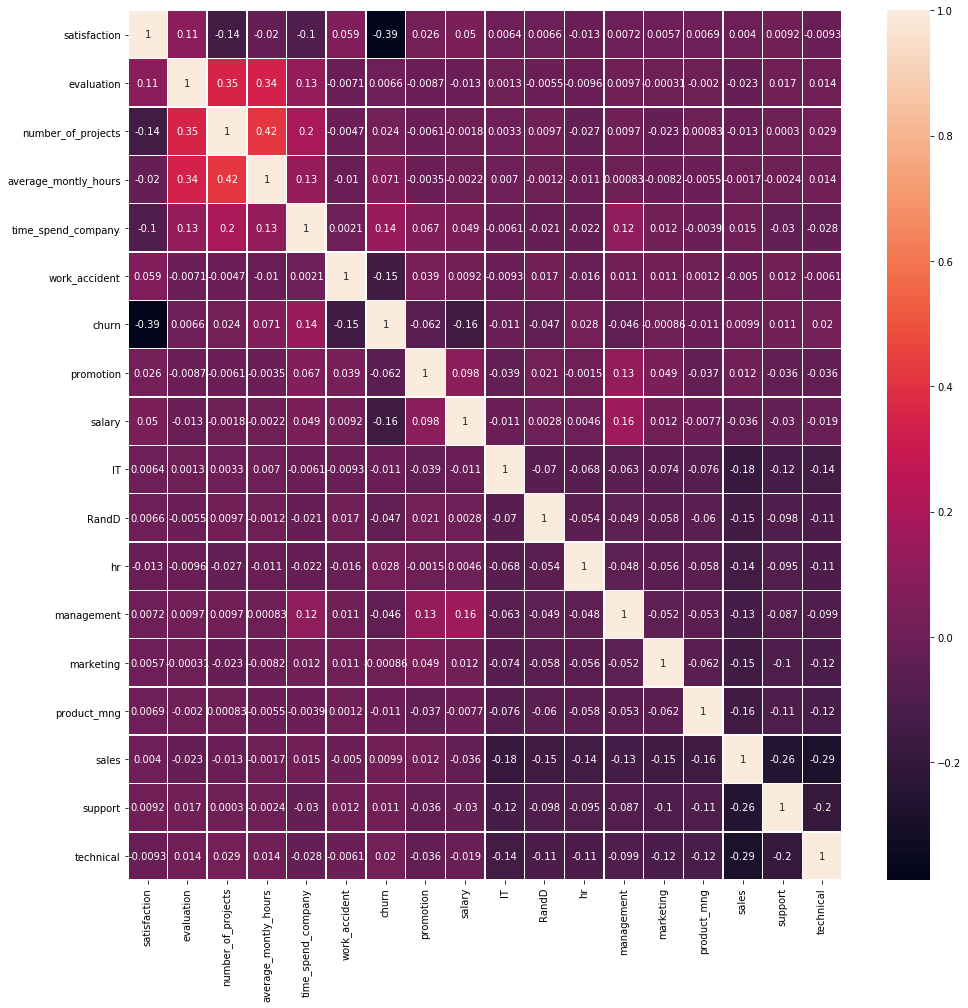

In [9]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(16,16))         
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()


#### Of all the features , satisfaction seems to be affecting churn the most as it has highest correlation (-0.39) with churn . Negative sign indicates inverse relationship between the two .

In [10]:
# Set the target and features

# Choose the dependent variable column (churn) and set it as target
target = data.churn

# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)
print(type(features))
a = features.columns.tolist()
print(a)

<class 'pandas.core.frame.DataFrame'>
['satisfaction', 'evaluation', 'number_of_projects', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion', 'salary', 'IT', 'RandD', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']


In [11]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split

# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

In [12]:
#Decision Tree based upon Gini Index 

In [13]:
#number of people who stayed/left
stayed = 37
left = 1138

#sum of stayed and left
total = stayed + left

#gini index
gini = 2*(stayed/total)*(left/total)
print(gini)

0.060995563603440474


In [14]:
# Basic Model
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train, target_train)

# Check the accuracy score of the prediction for the training set
print("Training set Accuracy :" , model.score(features_train,target_train)*100 )

# Check the accuracy score of the prediction for the test set
print("Test set Accuracy :" , model.score(features_test,target_test)*100)

Training set Accuracy : 100.0
Test set Accuracy : 97.22666666666666


In [15]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [16]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

C:\ANACONDA\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [17]:
#dot_data = StringIO()
#filename = "churntree.png"
#featureNames = features.columns.tolist()
#targetNames = data["churn"].unique().tolist()
#out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(target_train), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

In [18]:
## Cross-Validation and Hyperparameter Tuning

In [19]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


In [28]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]
print(type(samples))

#criterion 
cri = ["gini" , "entropy"]

splitter = ["best" , "random"]
# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

<class 'list'>


In [48]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples , criterion = cri , splitter = splitter )

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters , cv=10 )

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)
print(param_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'splitter': 'best'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [49]:
# Initialize it and call model by specifying the random_state parameter
model_best = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 50, splitter= 'best',random_state=42)

# Apply a decision tree model to fit features to the target
model_best.fit(features_train, target_train)

# Check the accuracy score of the prediction for the training set
print("Training set Accuracy :" , model_best.score(features_train,target_train)*100 )

# Check the accuracy score of the prediction for the test set
print("Test set Accuracy :" , model_best.score(features_test,target_test)*100)


Training set Accuracy : 97.021957507334
Test set Accuracy : 96.39999999999999


In [33]:
# Sorting important features 

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.392217
time_spend_company,0.235158
number_of_projects,0.189482
evaluation,0.136463
average_montly_hours,0.046680
management,0.000000
support,0.000000
sales,0.000000
product_mng,0.000000
marketing,0.000000


In [34]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [50]:
# Initialize the best model using parameters provided in description
model_best_final = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 50, splitter= 'best',random_state=42)


# Fit the model using only selected features from training set: done
model_best_final.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best_final.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best_final.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

96.39999999999999
90.63545150501672
94.42392974830226


In [51]:
from sklearn.metrics import classification_report
print(classification_report(target_test, prediction_best))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2853
           1       0.94      0.91      0.92       897

    accuracy                           0.96      3750
   macro avg       0.96      0.94      0.95      3750
weighted avg       0.96      0.96      0.96      3750



[Text(935.470588235294, 996.6, 'X[0] <= 0.465\nentropy = 0.791\nsamples = 11249\nvalue = [8575, 2674]'),
 Text(361.0588235294117, 815.4000000000001, 'X[0] <= 0.115\nentropy = 0.965\nsamples = 3127\nvalue = [1221, 1906]'),
 Text(295.4117647058823, 634.2, 'entropy = 0.0\nsamples = 678\nvalue = [0, 678]'),
 Text(426.70588235294116, 634.2, 'X[2] <= 2.5\nentropy = 1.0\nsamples = 2449\nvalue = [1221, 1228]'),
 Text(262.5882352941176, 453.0, 'X[1] <= 0.575\nentropy = 0.54\nsamples = 1300\nvalue = [161, 1139]'),
 Text(131.2941176470588, 271.79999999999995, 'X[1] <= 0.455\nentropy = 0.301\nsamples = 1199\nvalue = [64, 1135]'),
 Text(65.6470588235294, 90.59999999999991, 'entropy = 0.974\nsamples = 84\nvalue = [34, 50]'),
 Text(196.94117647058823, 90.59999999999991, 'entropy = 0.179\nsamples = 1115\nvalue = [30, 1085]'),
 Text(393.88235294117646, 271.79999999999995, 'X[0] <= 0.335\nentropy = 0.24\nsamples = 101\nvalue = [97, 4]'),
 Text(328.235294117647, 90.59999999999991, 'entropy = 0.0\nsamples

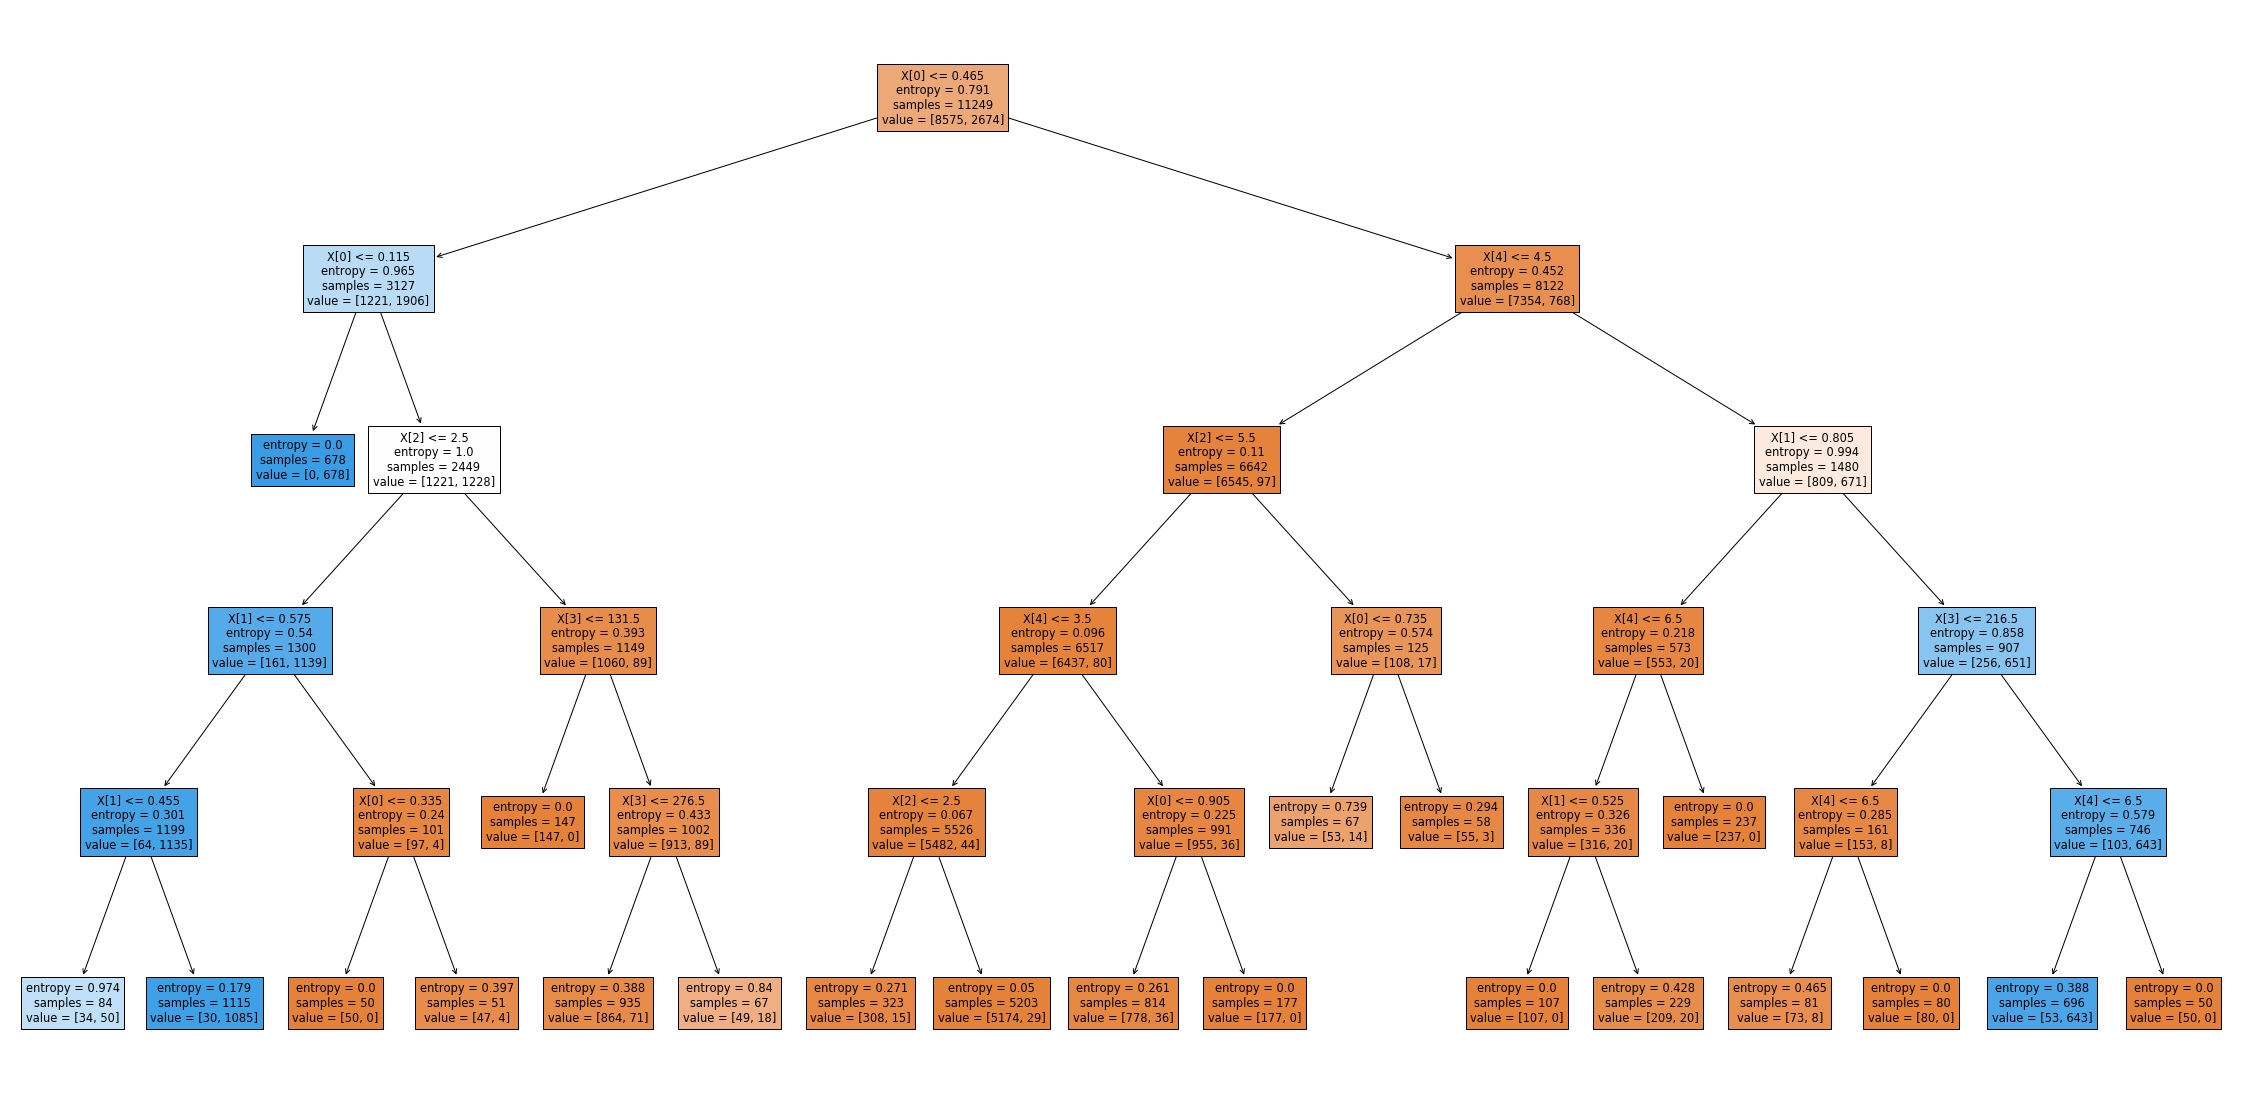

In [65]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(model_best_final , filled=True)

In [66]:
print(cross_val_score(model_best_final,features_train_selected, target_train,cv=10))

[0.96533333 0.97066667 0.95911111 0.97777778 0.97066667 0.968
 0.97155556 0.97244444 0.97333333 0.96530249]
